Collect data of the currently top 100 trending songs from different homepages via webscraping

In [226]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import re

In [142]:
# Webscrape the 50 most iconic songs of all time from Far Out Magazine:
url1 = "https://faroutmagazine.co.uk/50-most-iconic-songs-according-to-science/"

In [38]:
response1 = requests.get(url1)

In [40]:
soup1 = BeautifulSoup(response1.content)
soup1   

<!DOCTYPE html>
<html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">
<head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0, user-scalable=1, minimum-scale=1.0, maximum-scale=5.0, viewport-fit=cover" name="viewport"/><link crossorigin="" href="https://fonts.gstatic.com/" rel="preconnect dns-prefetch"/><link href="https://opzet.grv.media" rel="preconnect"/><style>body{font-family:-apple-system,BlinkMacSystemFont,"Segoe UI",Roboto,Oxygen-Sans,Ubuntu,Cantarell,"Helvetica Neue",sans-serif;font-display:swap;-moz-osx-font-smoothing:grayscale}@font-face { font-family: 'Gabarito'; font-style: normal; font-weight: 400; font-display: swap; src: url(https://fonts.gstatic.com/s/gabarito/v7/QGYwz_0dZAGKJJ4t3FFkc3Q8AkNP9Pj248K0Fg.ttf) format('truetype'); } @font-face { font-family: 'Gabarito'; font-style: normal; font-weight: 500; font-display: swap; src: url(https://fonts.gstatic.com/s/gabarito/v7/QGYwz_0dZAGKJJ4t3FFkc3Q8AkNP9Pj20cK0Fg.ttf) format('truetype'); } 

In [93]:
print(soup1.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=1, minimum-scale=1.0, maximum-scale=5.0, viewport-fit=cover" name="viewport"/>
  <link crossorigin="" href="https://fonts.gstatic.com/" rel="preconnect dns-prefetch"/>
  <link href="https://opzet.grv.media" rel="preconnect"/>
  <style>
   body{font-family:-apple-system,BlinkMacSystemFont,"Segoe UI",Roboto,Oxygen-Sans,Ubuntu,Cantarell,"Helvetica Neue",sans-serif;font-display:swap;-moz-osx-font-smoothing:grayscale}@font-face { font-family: 'Gabarito'; font-style: normal; font-weight: 400; font-display: swap; src: url(https://fonts.gstatic.com/s/gabarito/v7/QGYwz_0dZAGKJJ4t3FFkc3Q8AkNP9Pj248K0Fg.ttf) format('truetype'); } @font-face { font-family: 'Gabarito'; font-style: normal; font-weight: 500; font-display: swap; src: url(https://fonts.gstatic.com/s/gabarito/v7/QGYwz_0dZAGKJJ4t3FFkc3Q8AkNP9Pj20cK0Fg.ttf) fo

In [95]:
song_list = soup1.select("article ul li")
song_list

[<li><svg height="20" width="20"><use href="#list-arrow-svg"></use></svg>‘Smells Like Teen Spirit’ – Nirvana (1991)</li>,
 <li><svg height="20" width="20"><use href="#list-arrow-svg"></use></svg>‘Imagine’ – John Lennon (1971)</li>,
 <li><svg height="20" width="20"><use href="#list-arrow-svg"></use></svg>‘One’ – U2 (1992)</li>,
 <li><svg height="20" width="20"><use href="#list-arrow-svg"></use></svg>‘Billie Jean’ – Michael Jackson (1982)</li>,
 <li><svg height="20" width="20"><use href="#list-arrow-svg"></use></svg>‘Bohemian Rhapsody’ – Queen (1975)</li>,
 <li><svg height="20" width="20"><use href="#list-arrow-svg"></use></svg>‘Hey Jude’ – The Beatles (1968)</li>,
 <li><svg height="20" width="20"><use href="#list-arrow-svg"></use></svg>‘Like A Rolling Stone’ – Bob Dylan (1967)</li>,
 <li><svg height="20" width="20"><use href="#list-arrow-svg"></use></svg>‘I Can’t Get No Satisfaction’ – Rolling Stones (1965)</li>,
 <li><svg height="20" width="20"><use href="#list-arrow-svg"></use></svg>‘

In [111]:
song_list = [] 
for i in soup1.select("article ul li"):
   song_list.append(i.get_text())
song_list

['‘Smells Like Teen Spirit’ – Nirvana (1991)',
 '‘Imagine’ – John Lennon (1971)',
 '‘One’ – U2 (1992)',
 '‘Billie Jean’ – Michael Jackson (1982)',
 '‘Bohemian Rhapsody’ – Queen (1975)',
 '‘Hey Jude’ – The Beatles (1968)',
 '‘Like A Rolling Stone’ – Bob Dylan (1967)',
 '‘I Can’t Get No Satisfaction’ – Rolling Stones (1965)',
 '‘God Save The Queen’ – Sex Pistols (1977)',
 '‘Sweet Child O’Mine’ – Guns N’ Roses (1987)',
 '‘London Calling’ – The Clash (1979)',
 '‘Waterloo Sunset’ – The Kinks (1967)',
 '‘Hotel California’ – The Eagles (1976)',
 '‘Your Song’ – Elton John (1970)',
 '‘Stairway To Heaven’ – Led Zeppelin (1971)',
 '‘The Twist’ – Chubby Checker (1960)',
 '‘Live Forever’ – Oasis (1994)',
 '‘I Will Always Love You’ – Whitney Houston (1974)',
 '‘Life On Mars?’ – David Bowie (1971)',
 '‘Heartbreak Hotel’ – Elvis Presley (1956)',
 '‘Over The Rainbow’ – Judy Garland (1939)',
 '‘What’s Going On’ – Marvin Gaye (1971)',
 '‘Born To Run’ – Bruce Springsteen (1975)',
 '‘Be My Baby’ – The Rone

In [119]:
# Retrieve Release Year of the song
year = []
for song in song_list:
    year.append(song.split("(")[1].strip(")"))
year

['1991',
 '1971',
 '1992',
 '1982',
 '1975',
 '1968',
 '1967',
 '1965',
 '1977',
 '1987',
 '1979',
 '1967',
 '1976',
 '1970',
 '1971',
 '1960',
 '1994',
 '1974',
 '1971',
 '1956',
 '1939',
 '1971',
 '1975',
 '1963',
 '1992',
 '1974',
 '1965',
 '1971',
 '1976',
 '1966',
 '1967',
 '1965',
 '1958',
 '1975',
 '1994',
 '1983',
 '1967',
 '1962',
 '1965',
 '1969',
 '1959',
 '1978',
 '1966',
 '1964',
 '1965',
 '1965',
 '1984',
 '1964',
 '1966',
 '1977']

In [125]:
# Retrieve name of the song
title = []
for song in song_list:
    title.append(song.split("‘")[1].split("’") [0])
title

['Smells Like Teen Spirit',
 'Imagine',
 'One',
 'Billie Jean',
 'Bohemian Rhapsody',
 'Hey Jude',
 'Like A Rolling Stone',
 'I Can',
 'God Save The Queen',
 'Sweet Child O',
 'London Calling',
 'Waterloo Sunset',
 'Hotel California',
 'Your Song',
 'Stairway To Heaven',
 'The Twist',
 'Live Forever',
 'I Will Always Love You',
 'Life On Mars?',
 'Heartbreak Hotel',
 'Over The Rainbow',
 'What',
 'Born To Run',
 'Be My Baby',
 'Creep',
 'Bridge Over Troubled Water',
 'Respect',
 'Family Affair',
 'Dancing Queen',
 'Good Vibrations',
 'Purple Haze',
 'Yesterday',
 'Johnny B Goode',
 'No Woman No Cry',
 'Hallelujah',
 'Every Breath You Take',
 'A Day In The Life',
 'Stand By Me',
 'Papa',
 'Gimme Shelter',
 'What',
 'Sultans Of Swing',
 'God Only Knows',
 'You',
 'My Generation',
 'Dancing In The Street',
 'When Doves Cry',
 'A Change Is Gonna Come',
 'River Deep Mountain High',
 'Best Of My Love']

In [129]:
# Retrieve artist of the song
artist = []
for song in song_list:
    artist.append(song.split("’ – ")[1].split(" (")[0])
artist

['Nirvana',
 'John Lennon',
 'U2',
 'Michael Jackson',
 'Queen',
 'The Beatles',
 'Bob Dylan',
 'Rolling Stones',
 'Sex Pistols',
 'Guns N’ Roses',
 'The Clash',
 'The Kinks',
 'The Eagles',
 'Elton John',
 'Led Zeppelin',
 'Chubby Checker',
 'Oasis',
 'Whitney Houston',
 'David Bowie',
 'Elvis Presley',
 'Judy Garland',
 'Marvin Gaye',
 'Bruce Springsteen',
 'The Ronettes',
 'Radiohead',
 'Simon & Garfunkel',
 'Aretha Franklin',
 'Sly And The Family Stone',
 'ABBA',
 'The Beach Boys',
 'Jimi Hendrix',
 'The Beatles',
 'Chuck Berry',
 'Bob Marley',
 'Jeff Buckley',
 'The Police',
 'The Beatles',
 'Ben E King',
 'James Brown',
 'The Rolling Stones',
 'Ray Charles',
 'Dire Straits',
 'The Beach Boys',
 'The Righteous Brothers',
 'The Who',
 'Martha Reeves and the Vandellas',
 'Prince',
 'Sam Cooke',
 'Ike and Tina Turner',
 'The Emotions']

In [136]:
# Creating a dataframe for the FarQut Top 50 Songs
song_dict_farout = {"title":title, "artist": artist, "year":year}
df_song_dict_farout=pd.DataFrame(song_dict_farout)
df_song_dict_farout

title                           artist  year
0      Smells Like Teen Spirit                          Nirvana  1991
1                      Imagine                      John Lennon  1971
2                          One                               U2  1992
3                  Billie Jean                  Michael Jackson  1982
4            Bohemian Rhapsody                            Queen  1975
5                     Hey Jude                      The Beatles  1968
6         Like A Rolling Stone                        Bob Dylan  1967
7                        I Can                   Rolling Stones  1965
8           God Save The Queen                      Sex Pistols  1977
9                Sweet Child O                    Guns N’ Roses  1987
10              London Calling                        The Clash  1979
11             Waterloo Sunset                        The Kinks  1967
12            Hotel California                       The Eagles  1976
13                   Your Song                       Elton John  1970
14          Stairway To Heaven                     Led Zeppelin  1971
15                   The Twist                   Chubby Checker  1960
16                Live Forever                            Oasis  1994
17      I Will Always Love You                  Whitney Houston  1974
18               Life On Mars?                      David Bowie  1971
19            Heartbreak Hotel                    Elvis Presley  1956
20            Over The Rainbow                     Judy Garland  1939
21                        What                      Marvin Gaye  1971
22                 Born To Run                Bruce Springsteen  1975
23                  Be My Baby                     The Ronettes  1963
24                       Creep                        Radiohead  1992
25  Bridge Over Troubled Water                Simon & Garfunkel  1974
26                     Respect                  Aretha Franklin  1965
27               Family Affair         Sly And The Family Stone  1971
28               Dancing Queen                             ABBA  1976
29             Good Vibrations                   The Beach Boys  1966
30                 Purple Haze                     Jimi Hendrix  1967
31                   Yesterday                      The Beatles  1965
32              Johnny B Goode                      Chuck Berry  1958
33             No Woman No Cry                       Bob Marley  1975
34                  Hallelujah                     Jeff Buckley  1994
35       Every Breath You Take                       The Police  1983
36           A Day In The Life                      The Beatles  1967
37                 Stand By Me                       Ben E King  1962
38                        Papa                      James Brown  1965
39               Gimme Shelter               The Rolling Stones  1969
40                        What                      Ray Charles  1959
41            Sultans Of Swing                     Dire Straits  1978
42              God Only Knows                   The Beach Boys  1966
43                         You           The Righteous Brothers  1964
44               My Generation                          The Who  1965
45       Dancing In The Street  Martha Reeves and the Vandellas  1965
46              When Doves Cry                           Prince  1984
47      A Change Is Gonna Come                        Sam Cooke  1964
48    River Deep Mountain High              Ike and Tina Turner  1966
49             Best Of My Love                     The Emotions  1977

In [138]:
# Add a 'rank' column starting from 1 to the FarOut Song Dataframe

df_song_dict_farout['rank'] = range(1, len(df_song_dict_farout) + 1)
df_song_dict_farout

title                           artist  year  rank
0      Smells Like Teen Spirit                          Nirvana  1991     1
1                      Imagine                      John Lennon  1971     2
2                          One                               U2  1992     3
3                  Billie Jean                  Michael Jackson  1982     4
4            Bohemian Rhapsody                            Queen  1975     5
5                     Hey Jude                      The Beatles  1968     6
6         Like A Rolling Stone                        Bob Dylan  1967     7
7                        I Can                   Rolling Stones  1965     8
8           God Save The Queen                      Sex Pistols  1977     9
9                Sweet Child O                    Guns N’ Roses  1987    10
10              London Calling                        The Clash  1979    11
11             Waterloo Sunset                        The Kinks  1967    12
12            Hotel California                       The Eagles  1976    13
13                   Your Song                       Elton John  1970    14
14          Stairway To Heaven                     Led Zeppelin  1971    15
15                   The Twist                   Chubby Checker  1960    16
16                Live Forever                            Oasis  1994    17
17      I Will Always Love You                  Whitney Houston  1974    18
18               Life On Mars?                      David Bowie  1971    19
19            Heartbreak Hotel                    Elvis Presley  1956    20
20            Over The Rainbow                     Judy Garland  1939    21
21                        What                      Marvin Gaye  1971    22
22                 Born To Run                Bruce Springsteen  1975    23
23                  Be My Baby                     The Ronettes  1963    24
24                       Creep                        Radiohead  1992    25
25  Bridge Over Troubled Water                Simon & Garfunkel  1974    26
26                     Respect                  Aretha Franklin  1965    27
27               Family Affair         Sly And The Family Stone  1971    28
28               Dancing Queen                             ABBA  1976    29
29             Good Vibrations                   The Beach Boys  1966    30
30                 Purple Haze                     Jimi Hendrix  1967    31
31                   Yesterday                      The Beatles  1965    32
32              Johnny B Goode                      Chuck Berry  1958    33
33             No Woman No Cry                       Bob Marley  1975    34
34                  Hallelujah                     Jeff Buckley  1994    35
35       Every Breath You Take                       The Police  1983    36
36           A Day In The Life                      The Beatles  1967    37
37                 Stand By Me                       Ben E King  1962    38
38                        Papa                      James Brown  1965    39
39               Gimme Shelter               The Rolling Stones  1969    40
40                        What                      Ray Charles  1959    41
41            Sultans Of Swing                     Dire Straits  1978    42
42              God Only Knows                   The Beach Boys  1966    43
43                         You           The Righteous Brothers  1964    44
44               My Generation                          The Who  1965    45
45       Dancing In The Street  Martha Reeves and the Vandellas  1965    46
46              When Doves Cry                           Prince  1984    47
47      A Change Is Gonna Come                        Sam Cooke  1964    48
48    River Deep Mountain High              Ike and Tina Turner  1966    49
49             Best Of My Love                     The Emotions  1977    50

In [256]:
# Safe the updated datafile for df_song_dict_farout dataframe:
# df_song_dict_farout.to_csv("df_song_dict_farout.csv", index=False)
# ONLY DONE ONCE !

In [144]:
# Webscrape the 100 top trending songs from Billboard Charts
url2 = "https://www.billboard.com/charts/hot-100/"

In [146]:
response2 = requests.get(url2)

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]--><!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]--><!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]--><!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!--><html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboa
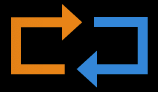

In [148]:
soup2 = BeautifulSoup(response2.content)
soup2  

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <!-- Add to home screen for iOS -->
  <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
  <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <!-- Tile icons for Windows -->
  <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
  <meta content="https://www.billboard.com/wp-cont
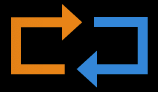

In [150]:
print(soup2.prettify())

In [162]:
# Retrieve the title names from Billboards Charts:
song_list_2 = soup2.select("ul li h3")
song_list_2

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					Luther		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Die With A Smile		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Not Like Us		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-sp

In [164]:
song_list_2 = [] 
for i in soup2.select("ul li h3"):
   song_list_2.append(i.get_text())
song_list_2

['\n\n\t\n\t\n\t\t\n\t\t\t\t\tLuther\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tDie With A Smile\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tNot Like Us\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tTV Off\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tA Bar Song (Tipsy)\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tAPT.\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tBirds Of A Feather\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tPink Pony Club\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tLose Control\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tSquabble Up\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tNokia\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tBeautiful Things\t\t\n\t\n',
 "\n\n\t\n\t\n\t\t\n\t\t\t\t\tThat's So True\t\t\n\t\n",
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tLove Somebody\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\t30 For 30\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tSports Car\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tI Had Some Help\t\t\n\t\n',
 '\n\n\t\n\t\n\t\t\n\t\t\t\t\tEspresso\t\t\n\t\n',
 "\n\n\t\n\t\n\t\t\n

In [170]:
# Retrieve name of the songs
title2 = []
title2 = [song.strip() for song in song_list_2]
title2

['Luther',
 'Die With A Smile',
 'Not Like Us',
 'TV Off',
 'A Bar Song (Tipsy)',
 'APT.',
 'Birds Of A Feather',
 'Pink Pony Club',
 'Lose Control',
 'Squabble Up',
 'Nokia',
 'Beautiful Things',
 "That's So True",
 'Love Somebody',
 '30 For 30',
 'Sports Car',
 'I Had Some Help',
 'Espresso',
 "I'm The Problem",
 'Timeless',
 'Messy',
 'Revolving Door',
 'All The Stars',
 'Taste',
 'Denial Is A River',
 'Too Sweet',
 'Good Luck, Babe!',
 'Gimme A Hug',
 'Die Trying',
 'DTMF',
 'Abracadabra',
 'Stargazing',
 'Who',
 'Bed Chem',
 'Liar',
 'Please Please Please',
 'Peekaboo',
 'Sailor Song',
 'Baile Inolvidable',
 'High Road',
 'No One Noticed',
 'BMF',
 'I Know Love',
 'Dear God',
 'Wildflower',
 'I Never Lie',
 'Sticky',
 'Smile',
 'Whatchu Kno About Me',
 'Cry For Me',
 "I'm Gonna Love You",
 'Busy Woman',
 'Purple Lace Bra',
 'Miss Possessive',
 'Indigo',
 'Residuals',
 'Tweaker',
 'Call Me When You Break Up',
 'Worst Way',
 'CN Tower',
 'Somebody Loves Me',
 'Bad Dreams',
 'Good Ne

In [232]:
# Remove the last 10 elements
title2a = title2[:-10]
title2a

['Luther',
 'Die With A Smile',
 'Not Like Us',
 'TV Off',
 'A Bar Song (Tipsy)',
 'APT.',
 'Birds Of A Feather',
 'Pink Pony Club',
 'Lose Control',
 'Squabble Up',
 'Nokia',
 'Beautiful Things',
 "That's So True",
 'Love Somebody',
 '30 For 30',
 'Sports Car',
 'I Had Some Help',
 'Espresso',
 "I'm The Problem",
 'Timeless',
 'Messy',
 'Revolving Door',
 'All The Stars',
 'Taste',
 'Denial Is A River',
 'Too Sweet',
 'Good Luck, Babe!',
 'Gimme A Hug',
 'Die Trying',
 'DTMF',
 'Abracadabra',
 'Stargazing',
 'Who',
 'Bed Chem',
 'Liar',
 'Please Please Please',
 'Peekaboo',
 'Sailor Song',
 'Baile Inolvidable',
 'High Road',
 'No One Noticed',
 'BMF',
 'I Know Love',
 'Dear God',
 'Wildflower',
 'I Never Lie',
 'Sticky',
 'Smile',
 'Whatchu Kno About Me',
 'Cry For Me',
 "I'm Gonna Love You",
 'Busy Woman',
 'Purple Lace Bra',
 'Miss Possessive',
 'Indigo',
 'Residuals',
 'Tweaker',
 'Call Me When You Break Up',
 'Worst Way',
 'CN Tower',
 'Somebody Loves Me',
 'Bad Dreams',
 'Good Ne

In [172]:
# Retrieve the artist names from Billboards Charts:
artist_list_2 = soup2.select("ul li span")
artist_list_2

[<span class="c-button__inner">
 		Log Out	</span>,
 <span class="c-button__inner">
 		Log Out	</span>,
 <span class="c-button__inner">
 		Log Out	</span>,
 <span class="lrv-a-screen-reader-only" data-label="c_icon_link_screen_reader_text">Share this article on Facebook</span>,
 <span class="lrv-a-screen-reader-only" data-label="c_icon_link_screen_reader_text">Share this article on Twitter</span>,
 <span class="lrv-a-screen-reader-only" data-label="c_icon_link_screen_reader_text">Share this article on Flipboard</span>,
 <span class="lrv-a-screen-reader-only" data-label="c_icon_link_screen_reader_text">Share this article on Pinit</span>,
 <span class="lrv-a-screen-reader-only" data-label="c_icon_link_screen_reader_text">+ additional share options added</span>,
 <span class="lrv-a-screen-reader-only" data-label="c_icon_link_screen_reader_text">Share this article on Tumblr</span>,
 <span class="lrv-a-screen-reader-only" data-label="c_icon_link_screen_reader_text">Share this article on Red

In [188]:
# Retrieve name of the artists
artist_list_2 = [] 
for i in soup2.select("ul li span.c-label"):
    artist = i.get_text(strip=True)  # Remove leading/trailing whitespace
    artist_list_2.append(artist)
artist_list_2

['1',
 'Kendrick Lamar & SZA',
 '1',
 '1',
 '14',
 '1',
 '1',
 '14',
 '2',
 'Lady Gaga & Bruno Mars',
 '3',
 '1',
 '28',
 '3',
 '1',
 '28',
 '3',
 'Kendrick Lamar',
 '2',
 '1',
 '42',
 '2',
 '1',
 '42',
 '4',
 'Kendrick Lamar Featuring Lefty Gunplay',
 '4',
 '2',
 '14',
 '4',
 '2',
 '14',
 '5',
 'Shaboozey',
 '9',
 '1',
 '46',
 '9',
 '1',
 '46',
 '6',
 'ROSE & Bruno Mars',
 '7',
 '3',
 '19',
 '7',
 '3',
 '19',
 '7',
 'Billie Eilish',
 '8',
 '2',
 '41',
 '8',
 '2',
 '41',
 '8',
 'Chappell Roan',
 '11',
 '8',
 '37',
 '11',
 '8',
 '37',
 '9',
 'Teddy Swims',
 '12',
 '1',
 '80',
 '12',
 '1',
 '80',
 '10',
 'Kendrick Lamar',
 '5',
 '1',
 '14',
 '5',
 '1',
 '14',
 '11',
 'Drake',
 '10',
 '10',
 '2',
 '10',
 '10',
 '2',
 '12',
 'Benson Boone',
 '13',
 '2',
 '57',
 '13',
 '2',
 '57',
 '13',
 'Gracie Abrams',
 '16',
 '6',
 '19',
 '16',
 '6',
 '19',
 '14',
 'Morgan Wallen',
 '19',
 '1',
 '19',
 '19',
 '1',
 '19',
 '15',
 'SZA With Kendrick Lamar',
 '14',
 '10',
 '10',
 '14',
 '10',
 '10',
 '16',

In [230]:
# Retrieve name of the artists
# Filter out one/two-digit numbers, "-", "RE-\nENTRY" and "NEW"
artist_list_2a = [item for item in artist_list_2 if not re.fullmatch(r'\d{1,2}|-|RE-\nENTRY|NEW', item)]
artist_list_2a

['Kendrick Lamar & SZA',
 'Lady Gaga & Bruno Mars',
 'Kendrick Lamar',
 'Kendrick Lamar Featuring Lefty Gunplay',
 'Shaboozey',
 'ROSE & Bruno Mars',
 'Billie Eilish',
 'Chappell Roan',
 'Teddy Swims',
 'Kendrick Lamar',
 'Drake',
 'Benson Boone',
 'Gracie Abrams',
 'Morgan Wallen',
 'SZA With Kendrick Lamar',
 'Tate McRae',
 'Post Malone Featuring Morgan Wallen',
 'Sabrina Carpenter',
 'Morgan Wallen',
 'The Weeknd & Playboi Carti',
 'Lola Young',
 'Tate McRae',
 'Kendrick Lamar & SZA',
 'Sabrina Carpenter',
 'Doechii',
 'Hozier',
 'Chappell Roan',
 'Drake',
 'PARTYNEXTDOOR, Drake & Yebba',
 'Bad Bunny',
 'Lady Gaga',
 'Myles Smith',
 'Jimin',
 'Sabrina Carpenter',
 'Jelly Roll',
 'Sabrina Carpenter',
 'Kendrick Lamar Featuring AzChike',
 'Gigi Perez',
 'Bad Bunny',
 'Koe Wetzel & Jessie Murph',
 'The Marias',
 'SZA',
 'Tate McRae Featauring The Kid LAROI',
 'Tate McRae',
 'Billie Eilish',
 'Zach Top',
 'Tyler, The Creator Featuring GloRilla, Sexyy Red & Lil Wayne',
 'Morgan Wallen',


In [234]:
title_element = soup2.select("h3.c-title.a-no-trucate")
title_element

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					Luther		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Die With A Smile		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Not Like Us		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-sp

In [236]:
len(title_element)

100

In [238]:
title2c = []
for i in title_element:
    title2c.append(i.get_text().strip())
title2c

['Luther',
 'Die With A Smile',
 'Not Like Us',
 'TV Off',
 'A Bar Song (Tipsy)',
 'APT.',
 'Birds Of A Feather',
 'Pink Pony Club',
 'Lose Control',
 'Squabble Up',
 'Nokia',
 'Beautiful Things',
 "That's So True",
 'Love Somebody',
 '30 For 30',
 'Sports Car',
 'I Had Some Help',
 'Espresso',
 "I'm The Problem",
 'Timeless',
 'Messy',
 'Revolving Door',
 'All The Stars',
 'Taste',
 'Denial Is A River',
 'Too Sweet',
 'Good Luck, Babe!',
 'Gimme A Hug',
 'Die Trying',
 'DTMF',
 'Abracadabra',
 'Stargazing',
 'Who',
 'Bed Chem',
 'Liar',
 'Please Please Please',
 'Peekaboo',
 'Sailor Song',
 'Baile Inolvidable',
 'High Road',
 'No One Noticed',
 'BMF',
 'I Know Love',
 'Dear God',
 'Wildflower',
 'I Never Lie',
 'Sticky',
 'Smile',
 'Whatchu Kno About Me',
 'Cry For Me',
 "I'm Gonna Love You",
 'Busy Woman',
 'Purple Lace Bra',
 'Miss Possessive',
 'Indigo',
 'Residuals',
 'Tweaker',
 'Call Me When You Break Up',
 'Worst Way',
 'CN Tower',
 'Somebody Loves Me',
 'Bad Dreams',
 'Good Ne

In [240]:
artist_element = soup2.select("span.c-label.a-no-trucate")
artist_element

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	Kendrick Lamar &amp; SZA
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Lady Gaga &amp; Bruno Mars
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Kendrick Lamar
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line 

In [242]:
len(artist_element)

100

In [246]:
artist2 = []
for i in artist_element:
    artist2.append(i.get_text().strip())
artist2

['Kendrick Lamar & SZA',
 'Lady Gaga & Bruno Mars',
 'Kendrick Lamar',
 'Kendrick Lamar Featuring Lefty Gunplay',
 'Shaboozey',
 'ROSE & Bruno Mars',
 'Billie Eilish',
 'Chappell Roan',
 'Teddy Swims',
 'Kendrick Lamar',
 'Drake',
 'Benson Boone',
 'Gracie Abrams',
 'Morgan Wallen',
 'SZA With Kendrick Lamar',
 'Tate McRae',
 'Post Malone Featuring Morgan Wallen',
 'Sabrina Carpenter',
 'Morgan Wallen',
 'The Weeknd & Playboi Carti',
 'Lola Young',
 'Tate McRae',
 'Kendrick Lamar & SZA',
 'Sabrina Carpenter',
 'Doechii',
 'Hozier',
 'Chappell Roan',
 'Drake',
 'PARTYNEXTDOOR, Drake & Yebba',
 'Bad Bunny',
 'Lady Gaga',
 'Myles Smith',
 'Jimin',
 'Sabrina Carpenter',
 'Jelly Roll',
 'Sabrina Carpenter',
 'Kendrick Lamar Featuring AzChike',
 'Gigi Perez',
 'Bad Bunny',
 'Koe Wetzel & Jessie Murph',
 'The Marias',
 'SZA',
 'Tate McRae Featauring The Kid LAROI',
 'Tate McRae',
 'Billie Eilish',
 'Zach Top',
 'Tyler, The Creator Featuring GloRilla, Sexyy Red & Lil Wayne',
 'Morgan Wallen',


In [248]:
# Creating a dataframe for the Billboard 100 Top Songs
song_dict_billboard = {"title":title2c, "artist": artist2}
df_song_dict_billboard=pd.DataFrame(song_dict_billboard)
df_song_dict_billboard

title                                  artist
0                 Luther                    Kendrick Lamar & SZA
1       Die With A Smile                  Lady Gaga & Bruno Mars
2            Not Like Us                          Kendrick Lamar
3                 TV Off  Kendrick Lamar Featuring Lefty Gunplay
4     A Bar Song (Tipsy)                               Shaboozey
..                   ...                                     ...
95               No Pole                             Don Toliver
96       Small Town Fame                                   Drake
97        Que Pasaria...              Rauw Alejandro & Bad Bunny
98            Greenlight                              Tate McRae
99  Weren't For The Wind                            Ella Langley

[100 rows x 2 columns]

In [250]:
# Add a 'rank' column starting from 1 to the Billboard Song Dataframe

df_song_dict_billboard['rank'] = range(1, len(df_song_dict_billboard) + 1)
df_song_dict_billboard

title                                  artist  rank
0                 Luther                    Kendrick Lamar & SZA     1
1       Die With A Smile                  Lady Gaga & Bruno Mars     2
2            Not Like Us                          Kendrick Lamar     3
3                 TV Off  Kendrick Lamar Featuring Lefty Gunplay     4
4     A Bar Song (Tipsy)                               Shaboozey     5
..                   ...                                     ...   ...
95               No Pole                             Don Toliver    96
96       Small Town Fame                                   Drake    97
97        Que Pasaria...              Rauw Alejandro & Bad Bunny    98
98            Greenlight                              Tate McRae    99
99  Weren't For The Wind                            Ella Langley   100

[100 rows x 3 columns]

In [254]:
# Safe the updated datafile for df_song_dict_billboard dataframe:
# df_song_dict_billboard.to_csv("df_song_dict_billboard.csv", index=False)
# ONLY DONE ONCE !

In [266]:
# Webscrape the 50 top trending songs from Spotify Viral
url3 = "https://open.spotify.com/playlist/37i9dQZEVXbLiRSasKsNU9"

In [260]:
response3 = requests.get(url3)

In [262]:
soup3 = BeautifulSoup(response3.content)
soup3

<!DOCTYPE html>
<html class="mobile-web-player" dir="ltr" lang="en"><head><meta charset="utf-8"/><title>Viral 50 - Global | Spotify Playlist</title><meta content="Spotify" property="og:site_name"/><meta content="174829003346" property="fb:app_id"/><link href="https://open.spotifycdn.com/cdn/images/favicon32.b64ecc03.png" rel="icon" sizes="32x32" type="image/png"/><link href="https://open.spotifycdn.com/cdn/images/favicon16.1c487bff.png" rel="icon" sizes="16x16" type="image/png"/><link href="https://open.spotifycdn.com/cdn/images/favicon.0f31d2ea.ico" rel="icon"/><meta content="IE=9" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="font" crossorigin="anonymous" href="https://encore.scdn.co/fonts/SpotifyMixUI-Regular-cc3b1de388efa4cbca6c75cebc24585e.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://encore.scdn.co/fonts/SpotifyMixUITitleVariable-8769ccfde3379b7ebcadd9529b49d0cc.woff2" r

In [264]:
print(soup3.prettify())

<!DOCTYPE html>
<html class="mobile-web-player" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Viral 50 - Global | Spotify Playlist
  </title>
  <meta content="Spotify" property="og:site_name"/>
  <meta content="174829003346" property="fb:app_id"/>
  <link href="https://open.spotifycdn.com/cdn/images/favicon32.b64ecc03.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://open.spotifycdn.com/cdn/images/favicon16.1c487bff.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="https://open.spotifycdn.com/cdn/images/favicon.0f31d2ea.ico" rel="icon"/>
  <meta content="IE=9" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="font" crossorigin="anonymous" href="https://encore.scdn.co/fonts/SpotifyMixUI-Regular-cc3b1de388efa4cbca6c75cebc24585e.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://encore.scdn.co/fonts/SpotifyMixUITitleVariable

In [ ]:
song_list_3 = [] 
for i in soup3.select("_____"):
   song_list_3.append(i.get_text())
song_list_3

In [ ]:
artist_list_3 = soup3.select("___________-")
artist_list_3

In [ ]:
# Creating a dataframe for the Spotify Viral 50 Top Songs
song_dict_spotify = {"title":title3, "artist": artist3}
df_song_dict_spotify=pd.DataFrame(song_dict_spotify)
df_song_dict_spotify

In [ ]:
# Add a 'rank' column starting from 1 to the Spotify Viral 50 Song Dataframe

df_song_dict_spotify['rank'] = range(1, len(df_song_dict_spotify) + 1)
df_song_dict_spotify

In [ ]:
# Safe the updated datafile for df_song_dictspotify dataframe:
df_song_dict_spotify.to_csv("df_song_dict_spotify.csv", index=False)
# ONLY DONE ONCE !